###Introduction

In [ ]:
#Program Title:
#Polynomial Interpolation

#Purpose:
#The purpose of this lab is to use polynomial interpolation to find the y value for f(x) using orders three through six.

#Date       Programmer      Version Number
#--------   -------------   ---------------
#03/26/24   J. S. Prieto    Version 1



###Data Dictionary

In [ ]:
#coffs      !coefficient matrix using the divided difference interpolation function


###Problem 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
x = np.array([0., 1., 2., 5.5, 11., 13., 16., 18.])

In [ ]:
print(type(x))

<class 'numpy.ndarray'>


In [ ]:
y = np.array([0.5, 3.134, 5.3, 9.9, 10.2, 9.35, 7.2, 6.2])

In [ ]:
print(y)

[ 0.5    3.134  5.3    9.9   10.2    9.35   7.2    6.2  ]


Text(0.5, 1.0, 'Raw Data')

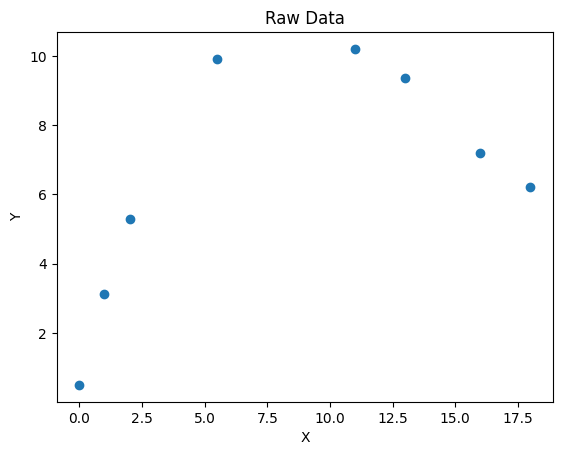

In [ ]:
#Visualize the x and y pairs of data
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Raw Data')

# Find the interpolated value at x = 14.5 using a third order polynomial

In [ ]:
#Interpolate the polynomial using a third order polynomial

In [ ]:
x3 = np.array([0., 1., 2., 5.5])
y3 = np.array([0.5, 3.134, 5.3, 9.9])


In [ ]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

In [ ]:
def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

In [ ]:
#First calculate the divided difference coefficients
coffs= divided_diff(x3, y3)
print(coffs)

[[ 5.00000000e-01  2.63400000e+00 -2.34000000e-01  8.13275613e-03]
 [ 3.13400000e+00  2.16600000e+00 -1.89269841e-01  0.00000000e+00]
 [ 5.30000000e+00  1.31428571e+00  0.00000000e+00  0.00000000e+00]
 [ 9.90000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [ ]:
#Calculate the predicted y value at x = 14.5
ypred3 = newton_poly(coffs[0,:],x3, 14.5)
print(ypred3)

12.787337662337688


In [ ]:
#Generate a vector of predictions to be able to plot with the row data
#First generate x values
xpred3_vec = np.arange(0,18,0.5)
print(xpred3_vec)
#Then call newton_poly to get the y value corresponding to each x value generated
ypred3_vec = newton_poly(coffs[0,:],x3, xpred3_vec)
print(ypred3_vec)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5]
[ 0.5         1.87854978  3.134       4.27245022  5.3         6.22274892
  7.04679654  7.77824242  8.42318615  8.98772727  9.47796537  9.9
 10.25993074 10.56385714 10.81787879 11.02809524 11.20060606 11.34151082
 11.45690909 11.55290043 11.63558442 11.71106061 11.78542857 11.86478788
 11.9552381  12.06287879 12.19380952 12.35412987 12.54993939 12.78733766
 13.07242424 13.4112987  13.81006061 14.27480952 14.81164502 15.42666667]


In [ ]:
#Now plot the fitted polynomial values along with the row data

Text(0.5, 1.0, 'Raw Data and Fitted Polynomial Values')

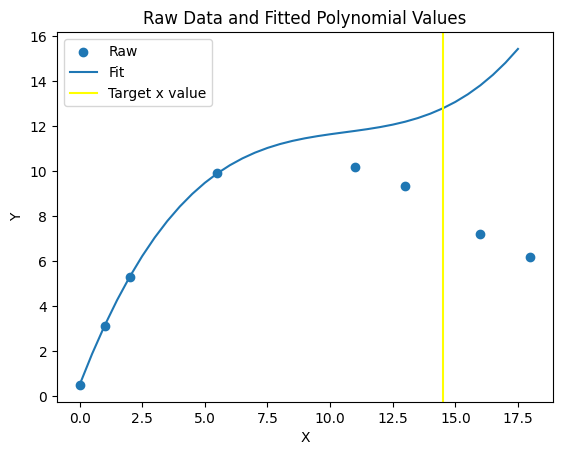

In [ ]:

plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x,y, label = 'Raw')
plt.plot(xpred3_vec,ypred3_vec, label = 'Fit')
plt.axvline(x = 14.5, color = 'yellow', label = 'Target x value')
plt.legend()
plt.title('Raw Data and Fitted Polynomial Values')

#Center the unknown x to get a better result

##3rd Order new

In [ ]:
#3rd order

x3new = np.array([11., 13., 16., 18.])
y3new = np.array([10.2, 9.35, 7.2, 6.2])

#Generate a vector of predictions to be able to plot with the row data
#First generate x values
xpred3new_vec = np.arange(0,18,0.5)
print(xpred3new_vec)
#Then call newton_poly to get the y value corresponding to each x value generated
ypred3new_vec = newton_poly(coffs[0,:],x3new, xpred3new_vec)
print(ypred3new_vec)

ypred3new_vec145 = newton_poly(coffs[0,:],x3new, 14.5)
print(ypred3new_vec145)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5]
[-44.98761905 -40.93276515 -37.08095238 -33.42699675 -29.96571429
 -26.691921   -23.6004329  -20.68606602 -17.94363636 -15.36795996
 -12.95385281 -10.69613095  -8.58961039  -6.62910714  -4.80943723
  -3.12541667  -1.57186147  -0.14358766   1.16458874   2.35785173
   3.44138528   4.42037338   5.3          6.08544913   6.78190476
   7.39455087   7.92857143   8.38915043   8.78147186   9.1107197
   9.38207792   9.60073052   9.77186147   9.90065476   9.99229437
  10.05196429]
9.110719696969698


Text(0.5, 1.0, 'Raw Data and Fitted Polynomial Values')

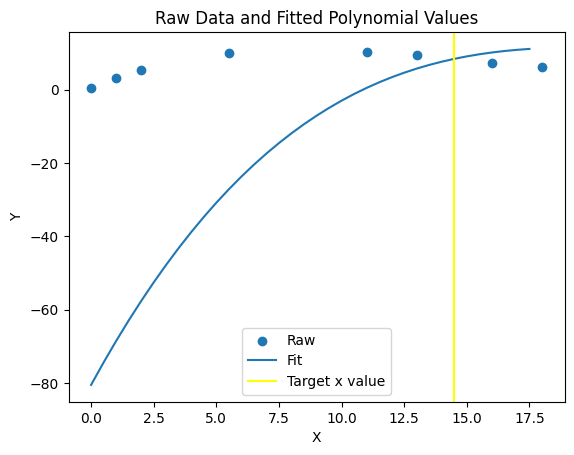

In [ ]:
#3rd new plot

plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x,y, label = 'Raw')
plt.plot(xpred3new_vec,ypred3new_vec, label = 'Fit')
plt.axvline(x = 14.5, color = 'yellow', label = 'Target x value')
plt.legend()
plt.title('Raw Data and Fitted Polynomial Values')

#Table for Order Number 3

In [ ]:
print('|'+('-'*71)+'|')
print(f'|\033[1m{"Order Number: 3":^71}\033[0m|') #table title
print('|'+('-'*71)+'|')
print(f'|\033[1m{"x":^11}\033[0m|{x3new[0]:^11,.1f}|{x3new[1]:^11,.1f}|{"14.5":^11}|{x3new[2]:^11,.1f}|{x3new[3]:^11,.1f}|') #x-values
print('|'+('-'*71)+'|')
print(f'|\033[1m{"y":^11}\033[0m|{y3new[0]:^11}|{y3new[1]:^11}|{newton_poly(coffs[0,:],x3new, 14.5):^11,.3f}|{y3new[2]:^11}|{y3new[3]:^11}|') #y-values
print('|'+('-'*71)+'|')

|-----------------------------------------------------------------------|
|                            Order Number: 3                            |
|-----------------------------------------------------------------------|
|     x     |   11.0    |   13.0    |   14.5    |   16.0    |   18.0    |
|-----------------------------------------------------------------------|
|     y     |   10.2    |   9.35    |   9.751   |    7.2    |    6.2    |
|-----------------------------------------------------------------------|


#4th order calc and plot

In [ ]:
#4th order

x4 = np.array([5.5, 11., 13., 16., 18.])
y4 = np.array([9.9, 10.2, 9.35, 7.2, 6.2])

coffs= divided_diff(x4, y4)
print(coffs)

#Generate a vector of predictions to be able to plot with the row data
#First generate x values
xpred4_vec = np.arange(0,18,0.5)
print(xpred4_vec)
#Then call newton_poly to get the y value corresponding to each x value generated
ypred4_vec = newton_poly(coffs[0,:],x4, xpred4_vec)
print(ypred4_vec)



[[ 9.90000000e+00  5.45454545e-02 -6.39393939e-02  5.33910534e-04
   1.11919192e-03]
 [ 1.02000000e+01 -4.25000000e-01 -5.83333333e-02  1.45238095e-02
   0.00000000e+00]
 [ 9.35000000e+00 -7.16666667e-01  4.33333333e-02  0.00000000e+00
   0.00000000e+00]
 [ 7.20000000e+00 -5.00000000e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 6.20000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5]
[19.39565714 17.30435606 15.55441558 14.1105619  12.9392     12.00841364
 11.28796537 10.74929654 10.36552727 10.11145649  9.9635619   9.9
  9.90060606  9.94689416 10.02205714 10.11096667 10.20017316 10.27790584
 10.33407273 10.36026061 10.34973506 10.29744048 10.2        10.05571558
  9.86456797  9.62821667  9.35        9.03493506  8.68971775  8.32272273
  7.94400346  7.56529221  7.2   

Text(0.5, 1.0, 'Raw Data and Fitted Polynomial Values')

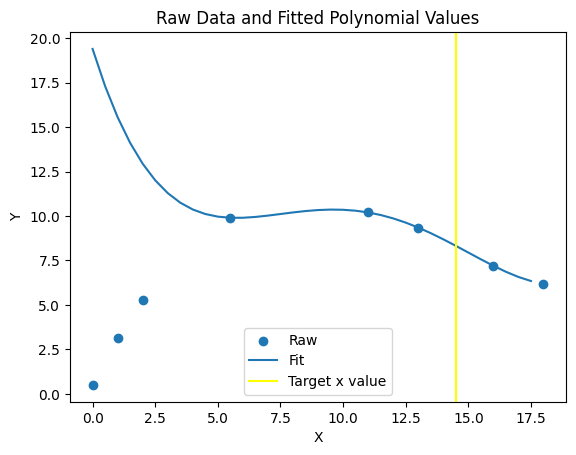

In [ ]:
#4th plot

plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x,y, label = 'Raw')
plt.plot(xpred4_vec,ypred4_vec, label = 'Fit')
plt.axvline(x = 14.5, color = 'yellow', label = 'Target x value')
plt.legend()
plt.title('Raw Data and Fitted Polynomial Values')

#Table for Order Number 4

In [ ]:
print('|'+('-'*83)+'|')
print(f'|\033[1m{"Order Number: 4":^83}\033[0m|') #table title
print('|'+('-'*83)+'|')
print(f'|\033[1m{"x":^11}\033[0m|{x4[0]:^11,.1f}|{x4[1]:^11,.1f}|{x4[2]:^11,.1f}|{"14.5":^11}|{x4[3]:^11,.1f}|{x4[4]:^11,.1f}|') #x-values
print('|'+('-'*83)+'|')
print(f'|\033[1m{"y":^11}\033[0m|{y4[0]:^11}|{y4[1]:^11}|{y4[2]:^11}|{newton_poly(coffs[0,:],y4, 14.5):^11,.3f}|{y4[3]:^11}|{y4[4]:^11}|') #y-values
print('|'+('-'*83)+'|')

|-----------------------------------------------------------------------------------|
|                                  Order Number: 4                                  |
|-----------------------------------------------------------------------------------|
|     x     |    5.5    |   11.0    |   13.0    |   14.5    |   16.0    |   18.0    |
|-----------------------------------------------------------------------------------|
|     y     |    9.9    |   10.2    |   9.35    |   9.773   |    7.2    |    6.2    |
|-----------------------------------------------------------------------------------|


In [ ]:
#5th order

x5 = np.array([2., 5.5, 11., 13., 16., 18.])
y5 = np.array([5.3, 9.9, 10.2, 9.35, 7.2, 6.2])

coffs= divided_diff(x5, y5)
print(coffs)

#Generate a vector of predictions to be able to plot with the row data
#First generate x values
xpred5_vec = np.arange(0,18,0.5)
print(xpred5_vec)
#Then call newton_poly to get the y value corresponding to each x value generated
ypred5_vec = newton_poly(coffs[0,:],x5, xpred5_vec)
print(ypred5_vec)

ypred5_vec145 = newton_poly(coffs[0,:],x5, 14.5)
print(ypred5_vec145)

[[ 5.30000000e+00  1.31428571e+00 -1.39971140e-01  6.91197691e-03
  -4.55576170e-04  9.84230056e-05]
 [ 9.90000000e+00  5.45454545e-02 -6.39393939e-02  5.33910534e-04
   1.11919192e-03  0.00000000e+00]
 [ 1.02000000e+01 -4.25000000e-01 -5.83333333e-02  1.45238095e-02
   0.00000000e+00  0.00000000e+00]
 [ 9.35000000e+00 -7.16666667e-01  4.33333333e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 7.20000000e+00 -5.00000000e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.20000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5]
[-2.89833469 -0.21570786  2.00156772  3.82021522  5.3         6.49409866
  7.44946815  8.20721485  8.80296364  9.26722701  9.62577415  9.9
 10.10729437 10.26141102 10.37283673 10.44916042 10.49544218 10.514582

Text(0.5, 1.0, 'Raw Data and Fitted Polynomial Values')

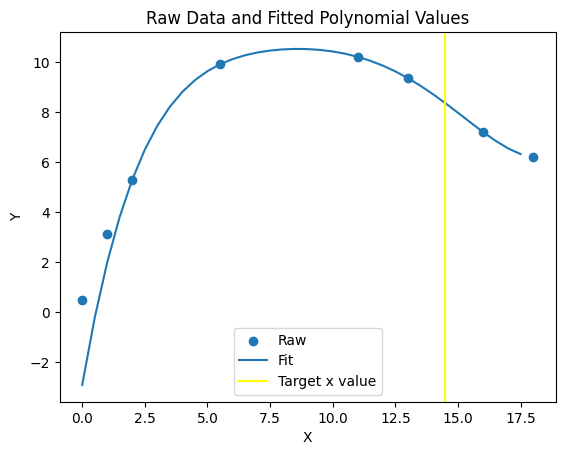

In [ ]:
#5th plot

plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x,y, label = 'Raw')
plt.plot(xpred5_vec,ypred5_vec, label = 'Fit')
plt.axvline(x = 14.5, color = 'yellow', label = 'Target x value')
plt.legend()
plt.title('Raw Data and Fitted Polynomial Values')

#Table for Order Number 5

In [ ]:
print('|'+('-'*95)+'|')
print(f'|\033[1m{"Order Number: 5":^95}\033[0m|') #table title
print('|'+('-'*95)+'|')
print(f'|\033[1m{"x":^11}\033[0m|{x5[0]:^11,.1f}|{x5[1]:^11,.1f}|{x5[2]:^11,.1f}|{"14.5":^11}|{x5[3]:^11,.1f}|{x5[4]:^11,.1f}|{x5[5]:^11,.1f}|') #x-values
print('|'+('-'*95)+'|')
print(f'|\033[1m{"y":^11}\033[0m|{y5[0]:^11}|{y5[1]:^11}|{y5[2]:^11}|{newton_poly(coffs[0,:],x5, 14.5):^11,.3f}|{y5[3]:^11}|{y5[4]:^11}|{y5[5]:^11}|') #y-values
print('|'+('-'*95)+'|')

|-----------------------------------------------------------------------------------------------|
|                                        Order Number: 5                                        |
|-----------------------------------------------------------------------------------------------|
|     x     |    2.0    |    5.5    |   11.0    |   14.5    |   13.0    |   16.0    |   18.0    |
|-----------------------------------------------------------------------------------------------|
|     y     |    5.3    |    9.9    |   10.2    |   8.347   |   9.35    |    7.2    |    6.2    |
|-----------------------------------------------------------------------------------------------|


In [ ]:
#6th order
x6 = np.array([1., 2., 5.5, 11., 13., 16., 18.])
y6 = np.array([3.134, 5.3, 9.9, 10.2, 9.35, 7.2, 6.2])

coffs= divided_diff(x6, y6)
print(coffs)

#Generate a vector of predictions to be able to plot with the row data
#First generate x values
xpred6_vec = np.arange(0,18,0.5)
print(xpred6_vec)
#Then call newton_poly to get the y value corresponding to each x value generated
ypred6_vec = newton_poly(coffs[0,:],x6, xpred6_vec)
print(ypred6_vec)

[[ 3.13400000e+00  2.16600000e+00 -1.89269841e-01  4.92987013e-03
   1.65175565e-04 -4.13834490e-05  8.22390909e-06]
 [ 5.30000000e+00  1.31428571e+00 -1.39971140e-01  6.91197691e-03
  -4.55576170e-04  9.84230056e-05  0.00000000e+00]
 [ 9.90000000e+00  5.45454545e-02 -6.39393939e-02  5.33910534e-04
   1.11919192e-03  0.00000000e+00  0.00000000e+00]
 [ 1.02000000e+01 -4.25000000e-01 -5.83333333e-02  1.45238095e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.35000000e+00 -7.16666667e-01  4.33333333e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.20000000e+00 -5.00000000e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.20000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17

Text(0.5, 1.0, 'Raw Data and Fitted Polynomial Values')

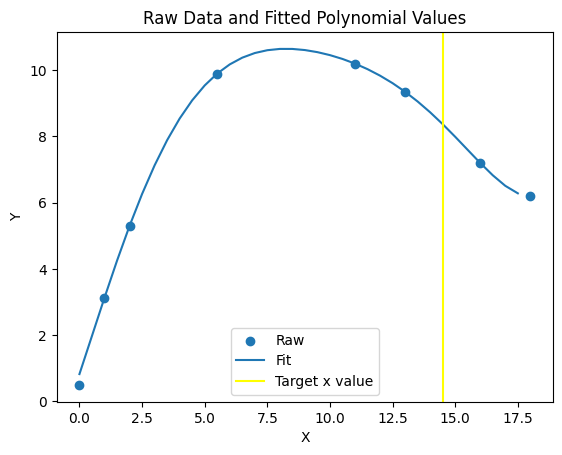

In [ ]:
#6th plot

plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x,y, label = 'Raw')
plt.plot(xpred6_vec,ypred6_vec, label = 'Fit')
plt.axvline(x = 14.5, color = 'yellow', label = 'Target x value')
plt.legend()
plt.title('Raw Data and Fitted Polynomial Values')

#Table for order number 6

In [ ]:
print('|'+('-'*107)+'|')
print(f'|{"Order Number: 6":^107}|')
print('|'+('-'*107)+'|')
print(f'|{"x":^11}|{x6[0]:^11,.1f}|{x6[1]:^11,.1f}|{x6[2]:^11,.1f}|{x6[3]:^11,.1f}|{x6[4]:^11,.1f}|{"14.5":^11}|{x6[5]:^11,.1f}|{x6[6]:^11,.1f}|')
print('|'+('-'*107)+'|')
print(f'|{"y":^11}|{newton_poly(coffs[0,:],x6, x6[0]):^11,.3f}|{newton_poly(coffs[0,:],x6, x6[1]):^11,.3f}|{newton_poly(coffs[0,:],x6, x6[2]):^11,.3f}|{newton_poly(coffs[0,:],x6, x6[3]):^11,.3f}|{newton_poly(coffs[0,:],x6, x6[4]):^11,.3f}|{newton_poly(coffs[0,:],x6, 14.5):^11,.3f}|{newton_poly(coffs[0,:],x6, x6[5]):^11,.3f}|{newton_poly(coffs[0,:],x6, x6[6]):^11,.3f}|')
print('|'+('-'*107)+'|')

|-----------------------------------------------------------------------------------------------------------|
|                                              Order Number: 6                                              |
|-----------------------------------------------------------------------------------------------------------|
|     x     |    1.0    |    2.0    |    5.5    |   11.0    |   13.0    |   14.5    |   16.0    |   18.0    |
|-----------------------------------------------------------------------------------------------------------|
|     y     |   3.134   |   5.300   |   9.900   |  10.200   |   9.350   |   8.373   |   7.200   |   6.200   |
|-----------------------------------------------------------------------------------------------------------|


#Problem 2

In [ ]:
xprob2 = np.array([1, 2, 3, 4, 5, 6, 7])
yprob2= np.array([3.6, 1.8, 1.2, 0.9, 0.72, 1.5, 0.51429])

coffs= divided_diff(xprob2, yprob2)
print(coffs)

#Generate a vector of predictions to be able to plot with the row data
#First generate x values
xpred_vec2 = np.arange(0,18,0.5)
print(xpred_vec2)
#Then call newton_poly to get the y value corresponding to each x value generated
ypred_vec2 = newton_poly(coffs[0,:],xprob2, xpred_vec2)
print(ypred_vec)



[[ 3.60000000e+00 -1.80000000e+00  6.00000000e-01 -1.50000000e-01
   3.00000000e-02  2.50000000e-03 -6.78570833e-03]
 [ 1.80000000e+00 -6.00000000e-01  1.50000000e-01 -3.00000000e-02
   4.25000000e-02 -3.82142500e-02  0.00000000e+00]
 [ 1.20000000e+00 -3.00000000e-01  6.00000000e-02  1.40000000e-01
  -1.48571250e-01  0.00000000e+00  0.00000000e+00]
 [ 9.00000000e-01 -1.80000000e-01  4.80000000e-01 -4.54285000e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.20000000e-01  7.80000000e-01 -8.82855000e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.50000000e+00 -9.85710000e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.14290000e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17

Text(0.5, 1.0, 'Raw Data and Fitted Polynomial Values')

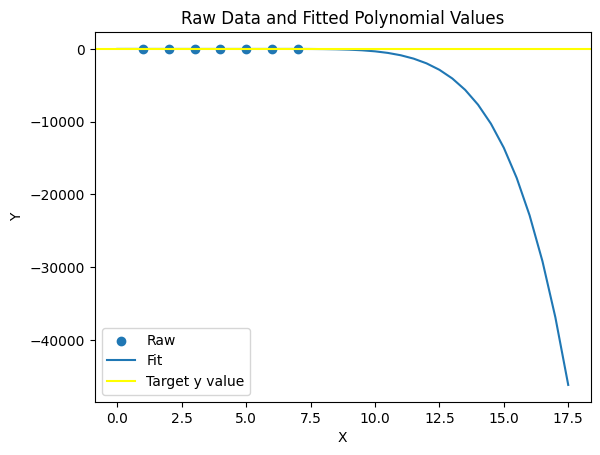

In [ ]:
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(xprob2,yprob2, label = 'Raw')
plt.plot(xpred_vec2,ypred_vec2, label = 'Fit')
plt.axhline(y = 1.7, color = 'yellow', label = 'Target y value')
plt.legend()
plt.title('Raw Data and Fitted Polynomial Values')

#4th order

In [ ]:
xprob2_4 = np.array([2, 3, 4, 5, 6])
yprob2_4= np.array([1.8, 1.2, 0.9, 0.72,1.5])

coffs= divided_diff(xprob2_4, yprob2_4)
print(coffs)

#Generate a vector of predictions to be able to plot with the row data
#First generate x values
xpred_vec2_4 = np.arange(0,4,0.05)
print(xpred_vec2_4)
#Then call newton_poly to get the y value corresponding to each x value generated
ypred_vec2_4 = newton_poly(coffs[0,:],xprob2_4, xpred_vec2_4)
print(ypred_vec2_4)

[[ 1.8    -0.6     0.15   -0.03    0.0425]
 [ 1.2    -0.3     0.06    0.14    0.    ]
 [ 0.9    -0.18    0.48    0.      0.    ]
 [ 0.72    0.78    0.      0.      0.    ]
 [ 1.5     0.      0.      0.      0.    ]]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45
 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95]
[9.72       9.29476589 8.88625425 8.49400589 8.117568   7.75649414
 7.41034425 7.07868464 6.761088   6.45713339 6.16640625 5.88849839
 5.623008   5.36953964 5.12770425 4.89711914 4.677408   4.46820089
 4.26913425 4.07985089 3.9        3.72923714 3.56722425 3.41362964
 3.268128   3.13040039 3.00013425 2.87702339 2.760768   2.65107464
 2.54765625 2.45023214 2.358528   2.272275